In [17]:
from os import listdir
from os.path import isfile, join

import pandas as pd
from preprocessing import preprocess
from scipy import stats
# import regex as r

appendage = "" 

mypath = "./data/" + appendage
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

if appendage == "/rewards/":

    onlyfiles.remove("default_reward.csv")
    save_file = "processed" + "_reward" + ".csv"
    max_df, df  = preprocess("data/rewards/default_reward.csv", column_name="Episode Maximum Reward")
    
elif appendage == "/time/":

    onlyfiles.remove("default_time.csv")
    save_file = "processed" + "_time" + ".csv"
    max_df, df  = preprocess("data/time/default_time.csv", x_axis="Relative Time (Process)", steps= [idx for idx in range(0, 360_000 + 1, int(1e2))])
    
else:

    onlyfiles.remove("default.csv")
    save_file = "processed.csv"
    max_df, df  = preprocess("data/default.csv")



onlyfiles

/Users/youri/Desktop/APE/plots/preprocessing.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([], index=idxs, columns=df.columns))


['per-v2.csv', 'per.csv', 'prop.csv', 'exp.csv']

In [18]:
for df_name in onlyfiles:
    max_df_, df_  = preprocess("data/" + appendage + df_name)#, x_axis="Relative Time (Process)", steps= [idx for idx in range(0, 360_000 + 1, int(1e2))])

    max_df = pd.concat([max_df, max_df_]).reset_index(drop=True)
    df = pd.concat([df, df_]).reset_index(drop=True)

df = df.rename(columns={"level_0": "frame"})

print(onlyfiles)

/Users/youri/Desktop/APE/plots/preprocessing.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([], index=idxs, columns=df.columns))
/Users/youri/Desktop/APE/plots/preprocessing.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([], index=idxs, columns=df.columns))
/Users/youri/Desktop/APE/plots/preprocessing.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([], index=idxs, columns=df.columns))
/Users/youri/Desktop/APE/plots/preprocessing.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([], index=idxs, columns=df.co

['per-v2.csv', 'per.csv', 'prop.csv', 'exp.csv']


In [19]:
df
df.algo.unique()

array(['default-1-f ', 'default-1-e ', 'default-1-d ', 'default-4-a ',
       'default-6-a ', 'default-6-b ', 'default-6-c ', 'default-8-a ',
       'default-8-b ', 'default-8-c ', 'default-2-a ', 'default-2-b ',
       'default-2-c ', 'default-4-b ', 'default-4-c ', 'default-1-a ',
       'default-1-b ', 'PER-v2-2-b ', 'PER-v2-4-b ', 'PER-v2-2-a ',
       'PER-v2-4-a ', 'PER-v2-8-b ', 'PER-v2-8-a ', 'PER-v2-16-b ',
       'PER-v2-16-a ', 'PER-v2-8-d ', 'PER-v2-16-d ', 'PER-v2-64-a ',
       'PER-v2-64-b ', 'PER-v2-64-c ', 'PER-v2-16-c ',
       'per-alpha1-beta0-4-e ', 'per-alpha1-beta0-6-d ',
       'per-alpha1-beta0-6-e ', 'per-alpha1-beta0-6-f ',
       'per-alpha1-beta0-8-e ', 'per-alpha1-beta0-8-d ',
       'per-alpha1-beta0-8-f ', 'per-alpha1-beta0-4-d ',
       'per-alpha1-beta0-16-d ', 'per-alpha1-beta0-64-b ',
       'per-alpha1-beta0-64-c ', 'per-alpha1-beta0-64-a ',
       'per-alpha1-beta0-16-a ', 'per-alpha1-beta0-16-b ',
       'prop-alpha1-beta0-4-c ', 'prop-alpha1-beta

In [20]:
# df["mem_size"] = df["algo"].str.extract(r'-[0-9]+-')
df["mem_size"] = df["algo"].str.extract('(\-[0-9]+\-)')#[1].astype(int)
df["mem_size"] = df["mem_size"].str[1:-1].astype(int)
df["algo_tot"] = df["algo"]
df["run"] = df["algo"].str[-2]
df["algo"] = df["algo"].str.extract('(^.*\-[0-9]+\-)')
df["algo"] = df["algo"].str.replace('(\-[0-9]+\-)', '')

df

/var/folders/jz/m7wdwkcj4ln9zjyc9v48t67c0000gn/T/ipykernel_7291/3306437819.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df["algo"] = df["algo"].str.replace('(\-[0-9]+\-)', '')


,frame,algo,room,mem_size,algo_tot,run
0,0,default,1.0,1,default-1-f,f
1,0,default,1.0,1,default-1-e,e
2,0,default,1.0,1,default-1-d,d
3,0,default,1.0,4,default-4-a,a
4,0,default,1.0,6,default-6-a,a
...,...,...,...,...,...,...
721070,1000000000,exp-theta2-k1,13.0,6,exp-theta2-k1-6-b,b
721071,1000000000,exp-theta2-k1,9.0,6,exp-theta2-k1-6-a,a
721072,1000000000,exp-theta2-k1,8.0,8,exp-theta2-k1-8-c,c
721073,1000000000,exp-theta2-k1,9.0,8,exp-theta2-k1-8-b,b


In [21]:
df["mem_size"].unique()

array([ 1,  4,  6,  8,  2, 16, 64])

In [22]:
df["algo"].unique()


array(['default', 'PER-v2', 'per-alpha1-beta0', 'prop-alpha1-beta0',
       'exp-theta2-k1'], dtype=object)

In [23]:

# df["mem_size"] = df["algo"].str.extract(pat='-[0-9]+-')#.astype(int)
# # frame_idx = df.drop_duplicates(subset=["room", "algo", "mem_size"], keep='first').frame
# # df = df[df.frame.isin(frame_idx)]
# df["algo_tot"] = df["algo"]
# df["run"] = df["algo"].str[-2]
# df["algo"] = df["algo"].str.extract(r'^.*-[0-9]-')
# max_df["algo"] = max_df["algo"].replace(algo_rename)
# algo_rename = {"PER-alpha1-beta0": "PER (alpha:1, beta:0)","per,fixedbeta": "PER no maximal appending (alpha:0.6, beta:0.4)", "per-alpha1-beta0": "PER no maximal appending (alpha:1, beta:0)", "per" : "PER no maximal appending (alpha:0.6, beta:0.4, B=10^5)"}
algo_rename = {"per-alpha1-beta0":"PER", "prop-alpha1-beta0":"proportional", "exp-theta2-k1":"exponential"}

df["algo"] = df["algo"].replace(algo_rename)

df = df[(df["algo"] != "PER no maximal appending (alpha:0.6, beta:0.4, B=10^5)") & (df["algo"] != "PER no maximal appending (alpha:0.6, beta:0.4)")]

In [24]:
df

,frame,algo,room,mem_size,algo_tot,run
0,0,default,1.0,1,default-1-f,f
1,0,default,1.0,1,default-1-e,e
2,0,default,1.0,1,default-1-d,d
3,0,default,1.0,4,default-4-a,a
4,0,default,1.0,6,default-6-a,a
...,...,...,...,...,...,...
721070,1000000000,exponential,13.0,6,exp-theta2-k1-6-b,b
721071,1000000000,exponential,9.0,6,exp-theta2-k1-6-a,a
721072,1000000000,exponential,8.0,8,exp-theta2-k1-8-c,c
721073,1000000000,exponential,9.0,8,exp-theta2-k1-8-b,b


In [25]:
df["algo"].unique()


array(['default', 'PER-v2', 'PER', 'proportional', 'exponential'],
      dtype=object)

In [26]:
df.loc[df.frame == 0, "frame"] = 1 
df

,frame,algo,room,mem_size,algo_tot,run
0,1,default,1.0,1,default-1-f,f
1,1,default,1.0,1,default-1-e,e
2,1,default,1.0,1,default-1-d,d
3,1,default,1.0,4,default-4-a,a
4,1,default,1.0,6,default-6-a,a
...,...,...,...,...,...,...
721070,1000000000,exponential,13.0,6,exp-theta2-k1-6-b,b
721071,1000000000,exponential,9.0,6,exp-theta2-k1-6-a,a
721072,1000000000,exponential,8.0,8,exp-theta2-k1-8-c,c
721073,1000000000,exponential,9.0,8,exp-theta2-k1-8-b,b


In [27]:
df.to_csv(save_file)



In [81]:
# max_df.to_csv("processed_score.csv")
# max_df["mem_size"] = max_df["mem_size"].astype(int)


In [62]:
# max_df["hmean std"] = stats.hmean(max_df.iloc[:,-4:-2],axis=1)





In [63]:
# df = df[df["frame"] <= 1e9]
# df = df.set_index(["frame", "algo_tot"])

In [64]:
df

,frame,algo,room,mem_size,algo_tot,run
0,1,default,1.0,4,default-4-a,a
1,1,default,1.0,6,default-6-a,a
2,1,default,1.0,6,default-6-b,b
3,1,default,1.0,6,default-6-c,c
4,1,default,1.0,8,default-8-a,a
...,...,...,...,...,...,...
650917,1000000000,exponential,9.0,4,exp-theta2-k1-4-c,c
650918,1000000000,exponential,16.0,4,exp-theta2-k1-4-a,a
650919,1000000000,exponential,11.0,2,exp-theta2-k1-2-a,a
650920,1000000000,exponential,12.0,1,exp-theta2-k1-1-c,c


In [65]:
# temp = df[["frame", "room", "run"]]
# temp

for algo in df.algo.unique():
    print(algo, " ", df[df["algo"] == algo].mem_size.unique())

default   [4 6 8 2 1]
PER-v2   [  8  64   4 256   2  16]
PER   [ 8 64  6  4 16]
proportional   [4 6 8 2 1]
exponential   [8 6 4 2 1]


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px



# sns.lineplot(data=df[(df.mem_size == 4) & (df.run == "a")], x="frame", y="room", hue="algo", ci=None, drawstyle="steps-pre") #ci=95, estimator='mean', n_boot=50)
# sns.lineplot(data=df[(df.mem_size == 4) & (df.run == "b")], x="frame", y="room", hue="algo", ci=None, drawstyle="steps-pre") #ci=95, estimator='mean', n_boot=50)
# sns.lineplot(data=df[(df.mem_size == 4) & (df.run == "c")], x="frame", y="room", hue="algo", ci=None, drawstyle="steps-pre") #ci=95, estimator='mean', n_boot=50)


# sns.lineplot(data=temp, x="frame", y="room", hue="run", errorbar="ci") #ci=95, estimator='mean', n_boot=50)
# sns.scatterplot(data=temp, x="frame", y="room", hue="run") #ci=95, estimator='mean', n_boot=50)


/Users/youri/Desktop/APE/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/Users/youri/Desktop/APE/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745), (0.8705882352941177, 0.5607843137254902, 0.0196078431372549)]


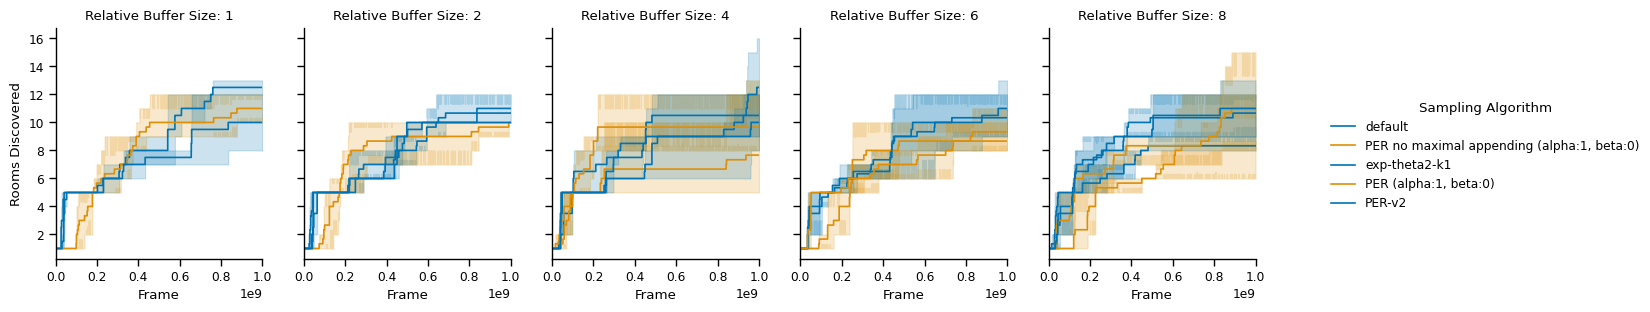

In [14]:
ticks = [10**9/ i for i in range(1,5)]

sns.set_context("paper", font_scale = 1)

palette = sns.color_palette("colorblind", 5)[:2]



g = sns.FacetGrid(df, col="mem_size", col_order=[1,2,4,6,8], hue="algo", palette=palette, gridspec_kws={"wspace":0.2}, margin_titles=True)
g.map(sns.lineplot, "frame", "room", drawstyle="steps-pre", errorbar=('ci', 95))
g.add_legend(title="Sampling Algorithm")
g.set(xlim=(0, 10**9), xlabel="Frame", ylabel="Rooms Discovered")
g.set_titles(row_template = '{row_name}', col_template = 'Relative Buffer Size: {col_name}')
#xticks=ticks, xticklabels=[str(round(tick/(10**9), 1))+"B" for tick in ticks]


# sns.relplot(data=df.iloc[:, :], x="N Frames", y="room", col="mem_size", hue="algo", ci=95, drawstyle="steps-pre") #ci=95, estimator='mean', n_boot=50)
print(palette)


In [13]:
cb = sns.color_palette("colorblind")
cb

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [14]:
from operator import itemgetter

itemgetter(0,2,3,4,8)(cb.as_hex()[:])


('#0173b2', '#029e73', '#d55e00', '#cc78bc', '#ece133')

/Users/youri/Desktop/APE/venv/lib/python3.8/site-packages/seaborn/categorical.py:1727: UserWarning: You passed a edgecolor/edgecolors ((0.12156862745098039, 0.4666666666666667, 0.7058823529411765)) for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/youri/Desktop/APE/venv/lib/python3.8/site-packages/seaborn/categorical.py:1727: UserWarning: You passed a edgecolor/edgecolors ((1.0, 0.4980392156862745, 0.054901960784313725)) for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


<AxesSubplot:xlabel='mem_size', ylabel='room'>

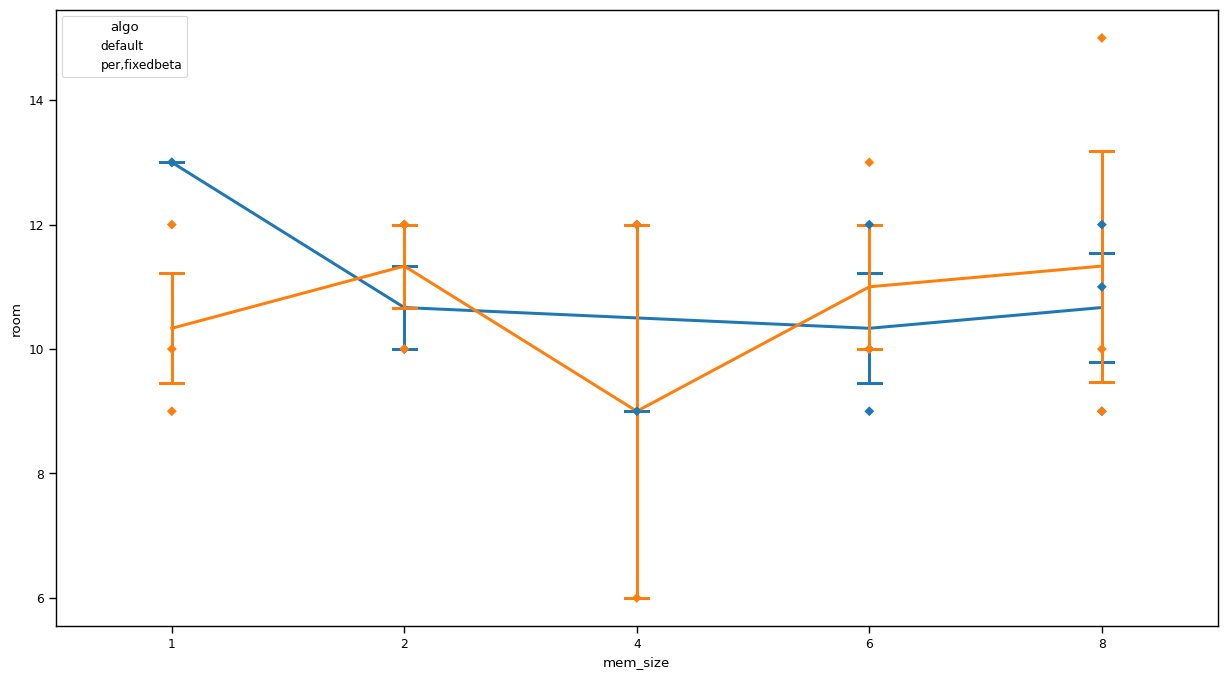

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.pointplot(max_df, x="mem_size", y="room", hue="algo", errorbar=('se'), markers="", capsize=.1, join=True, dodge=0.00)
sns.stripplot(max_df, x="mem_size", y="room", hue="algo", marker="D", legend=False, jitter=False)


In [39]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import plotly.express as px
 
# sns.set_style("dark")

# palette = sns.color_palette("Spectral", 13, 1)

# plt.figure(figsize=(15,8))

# order = ['default-1-a ', 'default-1-b ', 'default-2-a ',
#        'default-2-b ', 'default-2-c ', 'default-4-a ', 'default-4-b ', 'default-6-a ', 'default-6-b ', 'default-6-c ',
#        'default-8-a', 'default-8-b', 'default-8-c' ]

# plt.xlim(0, 1500000000)

# for i in range(len(max_df)):
#     print(max_df.iloc[i])
    
#     plt.axvline(x = max_df.iloc[i]["frame"], color = palette[i], linestyle="--", label=max_df.iloc[i]["algo"])

# print(palette[:])
# sns.lineplot(data=df.iloc[:, :], x="N Frames", y="room", hue="algo", hue_order=order, ci=None,  palette=palette) #ci=95, estimator='mean', n_boot=50)


# plt.legend()



In [40]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import plotly.express as px
 

# fig = px.line(df,x="N Frames", y="room", color="algo")
# for i in range(len(max_df)):
#     # print(max_df.iloc[i])
#     fig.add_shape(type='line', x0=max_df.iloc[i]["frame"],
#                 x1=max_df.iloc[i]["frame"], name=max_df.iloc[i]["algo"])
# fig.show()

In [35]:
df_temp = df_.drop_duplicates(subset=["room", "algo", "mem_size"], keep='first')
df_temp

,N Frames,algo,room,mem_size
0,28672,per,1.0,4
1,28672,per,1.0,2
4,28672,per,1.0,1
6,28672,per,1.0,6
9,28672,per,1.0,8
11469,29474816,per,2.0,1
13536,35123200,per,4.0,6
14119,36585472,per,5.0,6
14374,37273600,per,2.0,2
14376,37273600,per,2.0,4


<AxesSubplot:xlabel='N Frames', ylabel='room'>

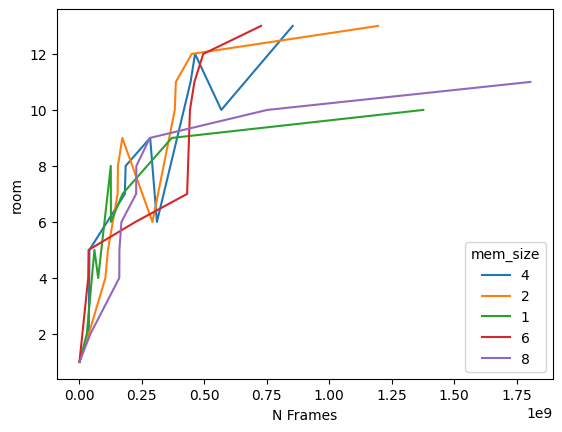

In [34]:
df_temp = df_.drop_duplicates(subset=["room", "algo", "mem_size"], keep='first')



In [212]:

# sns.boxplot(data=max_df, x="algo", y="room norm")

In [213]:
from scipy import stats


max_df

,algo,room,frame,room norm,frame norm,hmean norm
0,default-1,13.0,1693511680,1.00,0.000000,0.000000
1,default-1,13.0,759865344,1.00,0.629748,0.772816
2,default-2,12.0,639098880,0.75,0.711205,0.730088
3,default-2,10.0,650366976,0.25,0.703605,0.368918
4,default-2,10.0,685203456,0.25,0.680108,0.365607
5,default-4,12.0,482492416,0.75,0.816837,0.781993
6,default-4,9.0,210939904,0.00,1.000000,0.000000
7,default-6,9.0,732168192,0.00,0.648430,0.000000
8,default-6,10.0,563748864,0.25,0.762029,0.376486
9,default-6,12.0,454995968,0.75,0.835383,0.790392


<AxesSubplot:xlabel='algo', ylabel='hmean norm'>

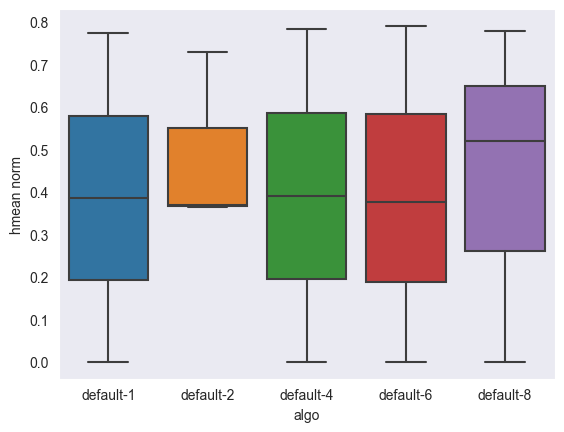

In [214]:
sns.boxplot(data=max_df, x="algo", y="hmean norm")

<AxesSubplot:xlabel='algo', ylabel='frame norm'>

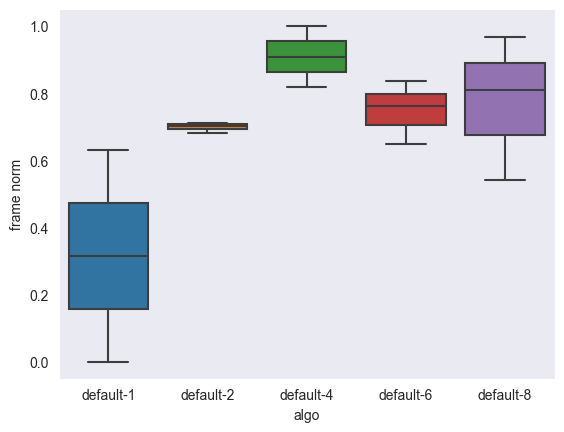

In [215]:
sns.boxplot(data=max_df, x="algo", y="frame norm")


<AxesSubplot:xlabel='algo', ylabel='room norm'>

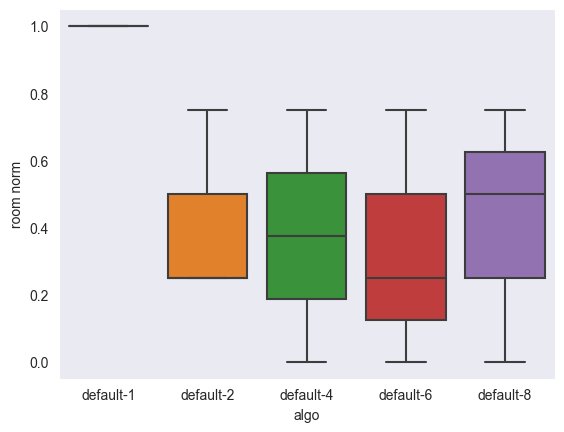

In [216]:
sns.boxplot(data=max_df, x="algo", y="room norm")


In [217]:
samples = []
var = "frame"
for i in [1,2,4,6,8]:
    samples.append(max_df[max_df["algo"] == "default-" + str(i)][var].tolist())
print(samples)
stats.kruskal(*samples)


[[1693511680, 759865344], [639098880, 650366976, 685203456], [482492416, 210939904], [732168192, 563748864, 454995968], [261115904, 491753472, 890724352]]


KruskalResult(statistic=6.34065934065935, pvalue=0.17511111214246172)

In [218]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output (ANOVA F and p value)
                sum_sq    df         F    PR(>F)
C(treatments)  3010.95   3.0  17.49281  0.000026
Residual        918.00  16.0       NaN       NaN

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary
# output (ANOVA F and p value)
                 df   sum_sq   mean_sq         F    PR(>F)
C(treatments)   3.0  3010.95  1003.650  17.49281  0.000026
Residual       16.0   918.00    57.375       NaN       NaN

IndentationError: unexpected indent (546198487.py, line 16)